In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia

/content/drive/My Drive/Practice/Chest_xray_pneumonia


In [ ]:
data = './'

In [ ]:
!unzip -q chest-xray-pneumonia.zip -d $data

**Import Lib**

In [3]:
from os import listdir
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
from tqdm import  tqdm
import cv2
import os
from PIL import Image
from numpy import save, load
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.callbacks import Callback, ModelCheckpoint

In [ ]:
def Dataset_loader(DIR, RESIZE):
    IMG = []
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR, IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".jpeg":
            img = cv2.imread(PATH)
            img = cv2.resize(img, (RESIZE, RESIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
           
            IMG.append(np.array(img))
    return IMG

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray

/content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray


**Fodel of data**

In [ ]:
NORMAL_train_folder = './train/NORMAL'
PNEUMONIA_train_folder = './train/PNEUMONIA'

NORMAL_val_folder = './val/NORMAL'
PNEUMONIA_val_folder = './val/PNEUMONIA'

NORMAL_test_folder = './test/NORMAL'
PNEUMONIA_test_folder = './test/PNEUMONIA'

**Prepare data**

In [ ]:
NORMAL_train = np.array(Dataset_loader(NORMAL_train_folder, 196))

In [ ]:
PNEUMONIA_train = np.array(Dataset_loader(PNEUMONIA_train_folder, 196))

In [ ]:
X_train = np.concatenate((NORMAL_train, PNEUMONIA_train), axis=0)

In [ ]:
NORMAL_train_label = np.zeros(len(NORMAL_train))
PNEUMONIA_train_label = np.ones(len(PNEUMONIA_train))
y_train = np.concatenate((NORMAL_train_label, PNEUMONIA_train_label), axis = 0)

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia

/content/drive/My Drive/Practice/Chest_xray_pneumonia


In [ ]:
save('train.npy', X_train)
save('train_label.npy', y_train)

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray

/content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray


In [ ]:
NORMAL_val = np.array(Dataset_loader(NORMAL_val_folder, 196))
PNEUMONIA_val = np.array(Dataset_loader(PNEUMONIA_val_folder, 196))
X_val = np.concatenate((NORMAL_val, PNEUMONIA_val), axis=0)

In [ ]:
NORMAL_val_label = np.zeros(len(NORMAL_val))
PNEUMONIA_val_label = np.ones(len(PNEUMONIA_val))
y_val = np.concatenate((NORMAL_val_label, PNEUMONIA_val_label), axis = 0)

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia

/content/drive/My Drive/Practice/Chest_xray_pneumonia


In [ ]:
save('val.npy', X_val)
save('val_label.npy', y_val)

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray

/content/drive/My Drive/Practice/Chest_xray_pneumonia/chest_xray


In [ ]:
NORMAL_test = np.array(Dataset_loader(NORMAL_test_folder, 196))
PNEUMONIA_test = np.array(Dataset_loader(PNEUMONIA_test_folder, 196))
X_test = np.concatenate((NORMAL_test, PNEUMONIA_test), axis=0)

In [ ]:
NORMAL_test_label = np.zeros(len(NORMAL_test))
PNEUMONIA_test_label = np.ones(len(PNEUMONIA_test))
y_test = np.concatenate((NORMAL_test_label, PNEUMONIA_test_label), axis = 0)

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia

/content/drive/My Drive/Practice/Chest_xray_pneumonia


In [ ]:
save('test.npy', X_test)
save('test_label.npy', y_test)

**Load data**

In [ ]:
X_train = load('train.npy')
y_train = load('train_label.npy')

X_test = load('test.npy')
y_test = load('test_label.npy')

X_val = load('val.npy')
y_val = load('val_label.npy')

**Convert label to one-hot**

In [ ]:
y_train =  to_categorical(y_train)
y_test = to_categorical(y_test)

**Split train:val(80/20)**

In [ ]:
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.2)

**Shuffle data**

In [ ]:
s = np.arange(X_train.shape[0])
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

s = np.arange(X_val.shape[0])
np.random.shuffle(s)

X_val = X_val[s]
y_val = y_val[s]

s = np.arange(X_test.shape[0])
np.random.shuffle(s)

X_test = X_test[s]
y_test = y_test[s]

**Display some image**

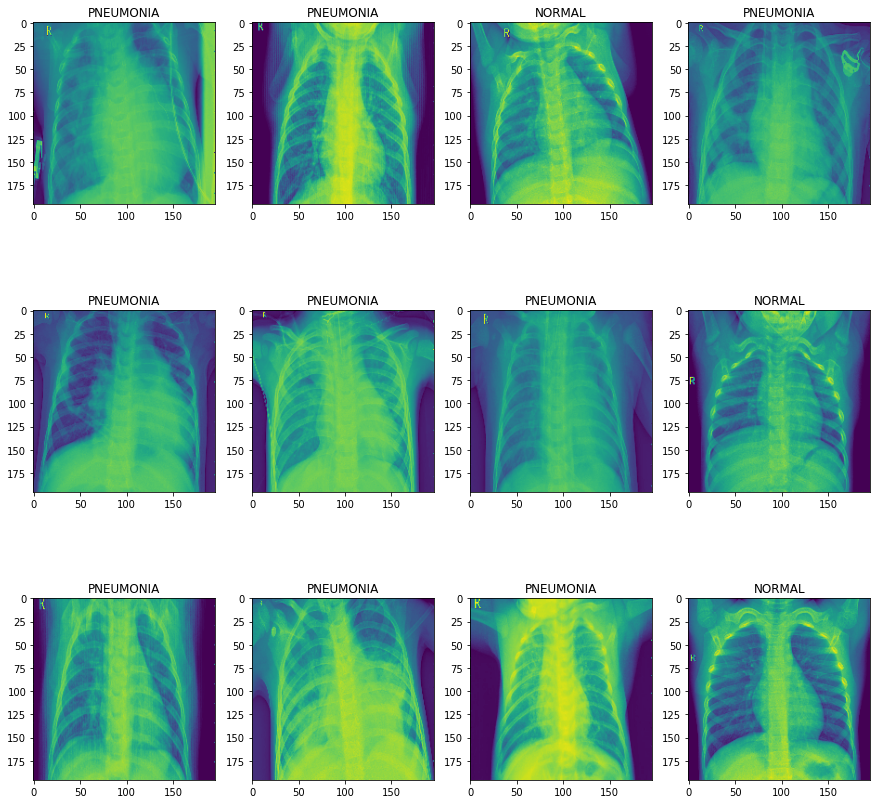

In [ ]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

X_test_display =  X_test
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if np.argmax(y_train[i]) == 0:
        ax.title.set_text('NORMAL')
    else:
        ax.title.set_text('PNEUMONIA')
    plt.imshow(X_train[i])
plt.show()

**Reshape data**

In [ ]:
#reshape data to 1 channel
X_train = X_train.reshape((X_train.shape[0], 196, 196, 1))
X_val = X_val.reshape((X_val.shape[0], 196, 196, 1))
X_test = X_test.reshape((X_test.shape[0], 196, 196, 1))

#Normalize data range 0-1
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**Generator data**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

**Define Model**

In [ ]:
model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu', input_shape=(196, 196, 1)))
model.add(Conv2D(filters=8, kernel_size=(7,7), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 8)       400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 8)       3144      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 65, 65, 16)        3216      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 65, 65, 16)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 32)        4

**Compile model**

In [ ]:
optimizer = Adam(lr=0.0001, decay=1e-5)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
cd /content/drive/My Drive/Practice/Chest_xray_pneumonia

/content/drive/My Drive/Practice/Chest_xray_pneumonia


**Checkpoint**

In [ ]:
filepath="top.weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor= 'val_accuracy' , verbose=1, save_best_only=True,
mode= max )
callbacks_list = [checkpoint]

**Fit model**

In [ ]:
N = model.fit(datagen.flow(X_train,y_train, batch_size=16),
              validation_data=(X_val, y_val),
              epochs=100,
              verbose = 2,
              callbacks=callbacks_list)

Epoch 1/100

Epoch 00001: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0877 - accuracy: 0.9672 - val_loss: 0.0764 - val_accuracy: 0.9751
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0845 - accuracy: 0.9686 - val_loss: 0.0827 - val_accuracy: 0.9703
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0863 - accuracy: 0.9684 - val_loss: 0.0913 - val_accuracy: 0.9703
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0905 - accuracy: 0.9686 - val_loss: 0.0752 - val_accuracy: 0.9751
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0802 - accuracy: 0.9708 - val_loss: 0.0769 - val_accuracy: 0.9761
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.97605
261/261 - 17s - loss: 0.0753 - accuracy: 0.9724 - val_loss: 0.0811 - val_accuracy: 0.9732
Epoch 7/100

Epoch 00007: val_accuracy did not impro

**Save Model**

In [ ]:
model.save_weights('my_Model.h5')

**Load model**

In [ ]:
model.load_weights('my_Model.h5')

**Visualize accuracy and loss**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


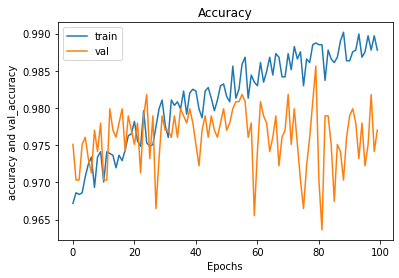

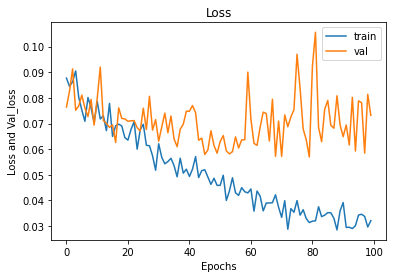

In [ ]:
print(N.history.keys())
fig = plt.figure()
#plot accuracy and val_accuracy
plt.plot(N.history['accuracy'])
plt.plot(N.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('accuracy and val_accuracy')
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure()
#plot loss and val_loss
plt.plot(N.history['loss'])
plt.plot(N.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss and Val_loss')
plt.title('Loss')
plt.legend(['train', 'val'])
plt.show()

**Evaluate Model**

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

20/20 - 1s - loss: 0.5358 - accuracy: 0.8926
Accuracy: 0.893
Loss: 0.536


**Predict**

In [ ]:
y_pred = model.predict(X_test)

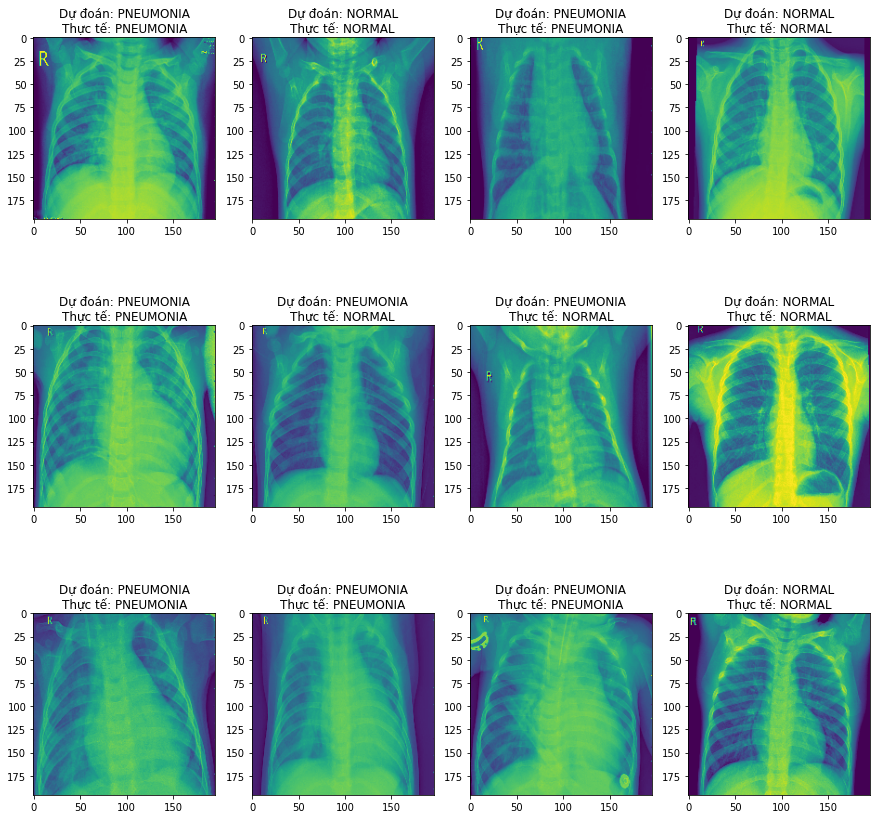

In [ ]:
fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 3

classNames = {0: 'NORMAL',
              1: 'PNEUMONIA'}

for i in range(rows*columns):
    ax = fig.add_subplot(rows, columns, i+1)
    plt.title("Dự đoán: "+ classNames[np.argmax(y_pred[i])] +"\n"+"Thực tế: "+ classNames[np.argmax(y_test[i])])
    plt.imshow(X_test_display[i])
plt.show()